In [1]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 7.4 MB/s eta 0:00:00


In [2]:
!pip install PyDrive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyDrive: filename=PyDrive-1.3.1-py3-none-any.whl size=27433 sha256=0aee49ee088c829811eb9af2d791c04ceac4904f817ee266686dac0134ea505b
  Stored in directory: /root/.cache/pip/wheels/6c/10/da/a5b513f5b3916fc391c20ee7b4633e5cf3396d570cdd74970f
Successfully built PyDrive


In [3]:
# General-purpose imports
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import quote
import webbrowser
import random
from collections import defaultdict
from base64 import b64decode

# Scikit-learn imports
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Imbalanced-learn imports
from imblearn.over_sampling import SMOTE

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,
    Input, GlobalAveragePooling2D, SeparableConv2D, Multiply
)
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2

# For AdamW optimizer (if available)
try:
    from tensorflow.keras.optimizers import AdamW
except ImportError:
    AdamW = Adam

# IPython displays
from IPython.display import display

# Kerastuner imports
from kerastuner.tuners import RandomSearch

# Google Colab imports
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

/tmp/ipython-input-4035724408.py:46: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [4]:
# Kaggle imports
import kagglehub

import zipfile
import os

# Path to your ZIP file in Google Drive
zip_path = "/content/drive/MyDrive/fer2013/fer2013.zip"

# Destination folder where contents will be extracted
extract_path = "/content/fer2013"

# Extract the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted folders/files
print(os.listdir(extract_path))

['train', 'test']


=== FER2013 Facial Expression Recognition with Enhanced Accuracy ===

Creating data generators with grayscale images...
Found 22619 images belonging to 6 classes.
Found 5654 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.

=== Dataset Analysis ===
Training class distribution:


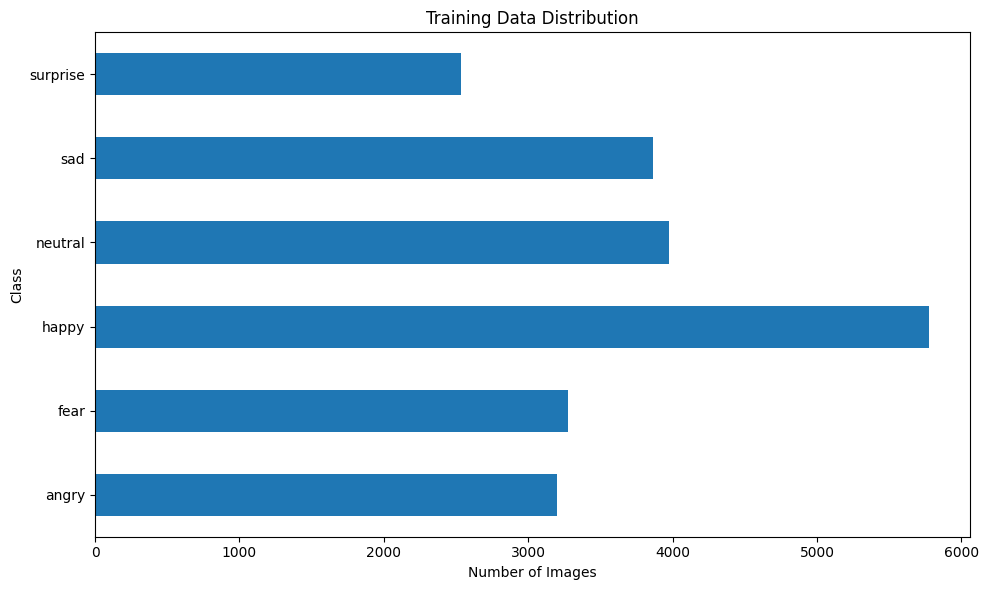

Class counts for Training Data Distribution:
  angry: 3196
  fear: 3278
  happy: 5772
  neutral: 3972
  sad: 3864
  surprise: 2537
Validation class distribution:


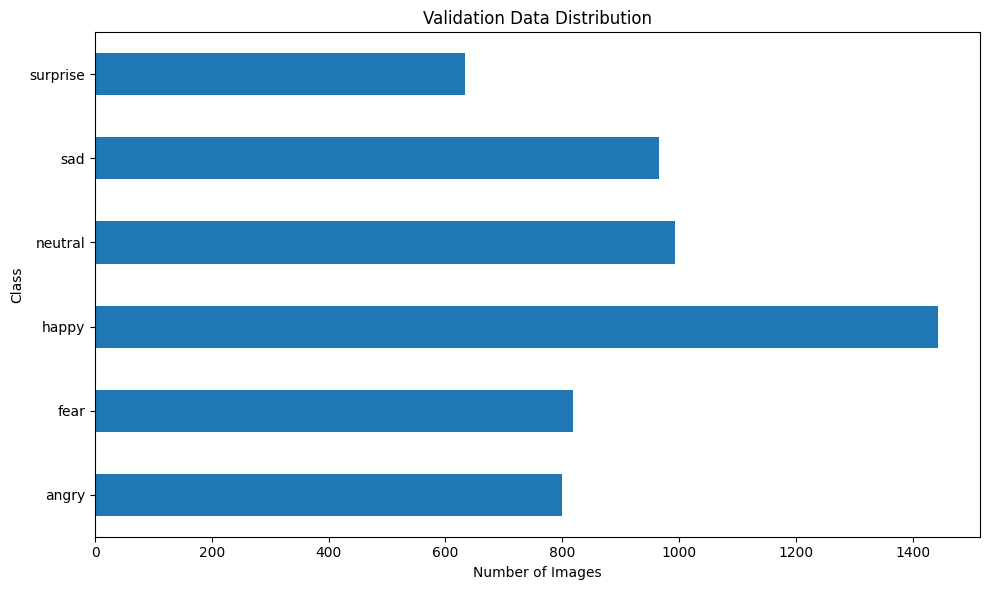

Class counts for Validation Data Distribution:
  angry: 799
  fear: 819
  happy: 1443
  neutral: 993
  sad: 966
  surprise: 634
Test class distribution:


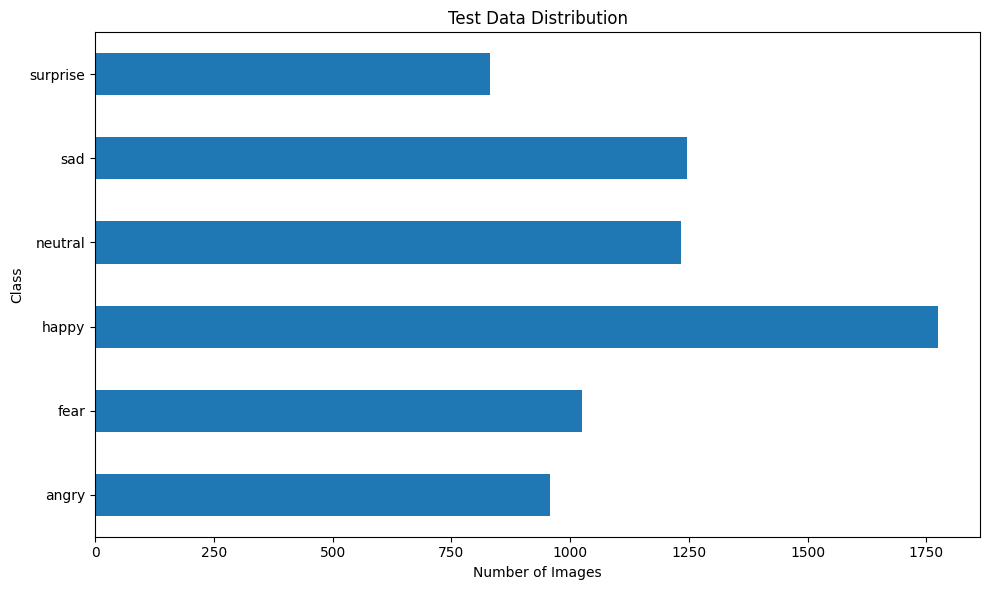

Class counts for Test Data Distribution:
  angry: 958
  fear: 1024
  happy: 1774
  neutral: 1233
  sad: 1247
  surprise: 831

Input shape: (48, 48, 1)
Number of classes: 6

TRAINING ADVANCED CNN MODEL
Advanced CNN Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 48, 48,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 24, 24,    │          0 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ dropout[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 24, 24,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 24, 24,    │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 24, 24,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 24, 24,    │      2,112 │ dropout[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 24, 24,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 24, 24,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 12, 12,    │          0 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 12, 12,    │     73,856 │ dropout_1[0][0] 

 Total params: 1,509,766 (5.76 MB)

 Trainable params: 1,506,118 (5.75 MB)

 Non-trainable params: 3,648 (14.25 KB)

Class weights for handling imbalance:
  angry: 1.1795
  fear: 1.1500
  happy: 0.6531
  neutral: 0.9491
  sad: 0.9756
  surprise: 1.4859
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.1721 - loss: 2.0291
Epoch 1: val_accuracy improved from -inf to 0.21312, saving model to best_advanced_cnn_model.keras
354/354 ━━━━━━━━━━━━━━━━━━━━ 65s 124ms/step - accuracy: 0.1721 - loss: 2.0289 - val_accuracy: 0.2131 - val_loss: 1.7787 - learning_rate: 0.0010
Epoch 2/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1834 - loss: 1.8077
Epoch 2: val_accuracy did not improve from 0.21312
354/354 ━━━━━━━━━━━━━━━━━━━━ 28s 80ms/step - accuracy: 0.1834 - loss: 1.8077 - val_accuracy: 0.1891 - val_loss: 1.7649 - learning_rate: 0.0010
Epoch 3/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1869 - loss: 1.7937
Epoch 3: val_accuracy improved from 0.21312 to 0.23116, saving model to best_advanced_cnn_model.keras
354/354 ━━━━━━━━━━━━━━━━━━━━ 29s 81ms/step - accuracy: 0.1869 - loss: 1.7937 - val_accuracy: 0.2312 - val_loss: 1.7673 - learning_rate: 0.0010
Epoch 4/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy:

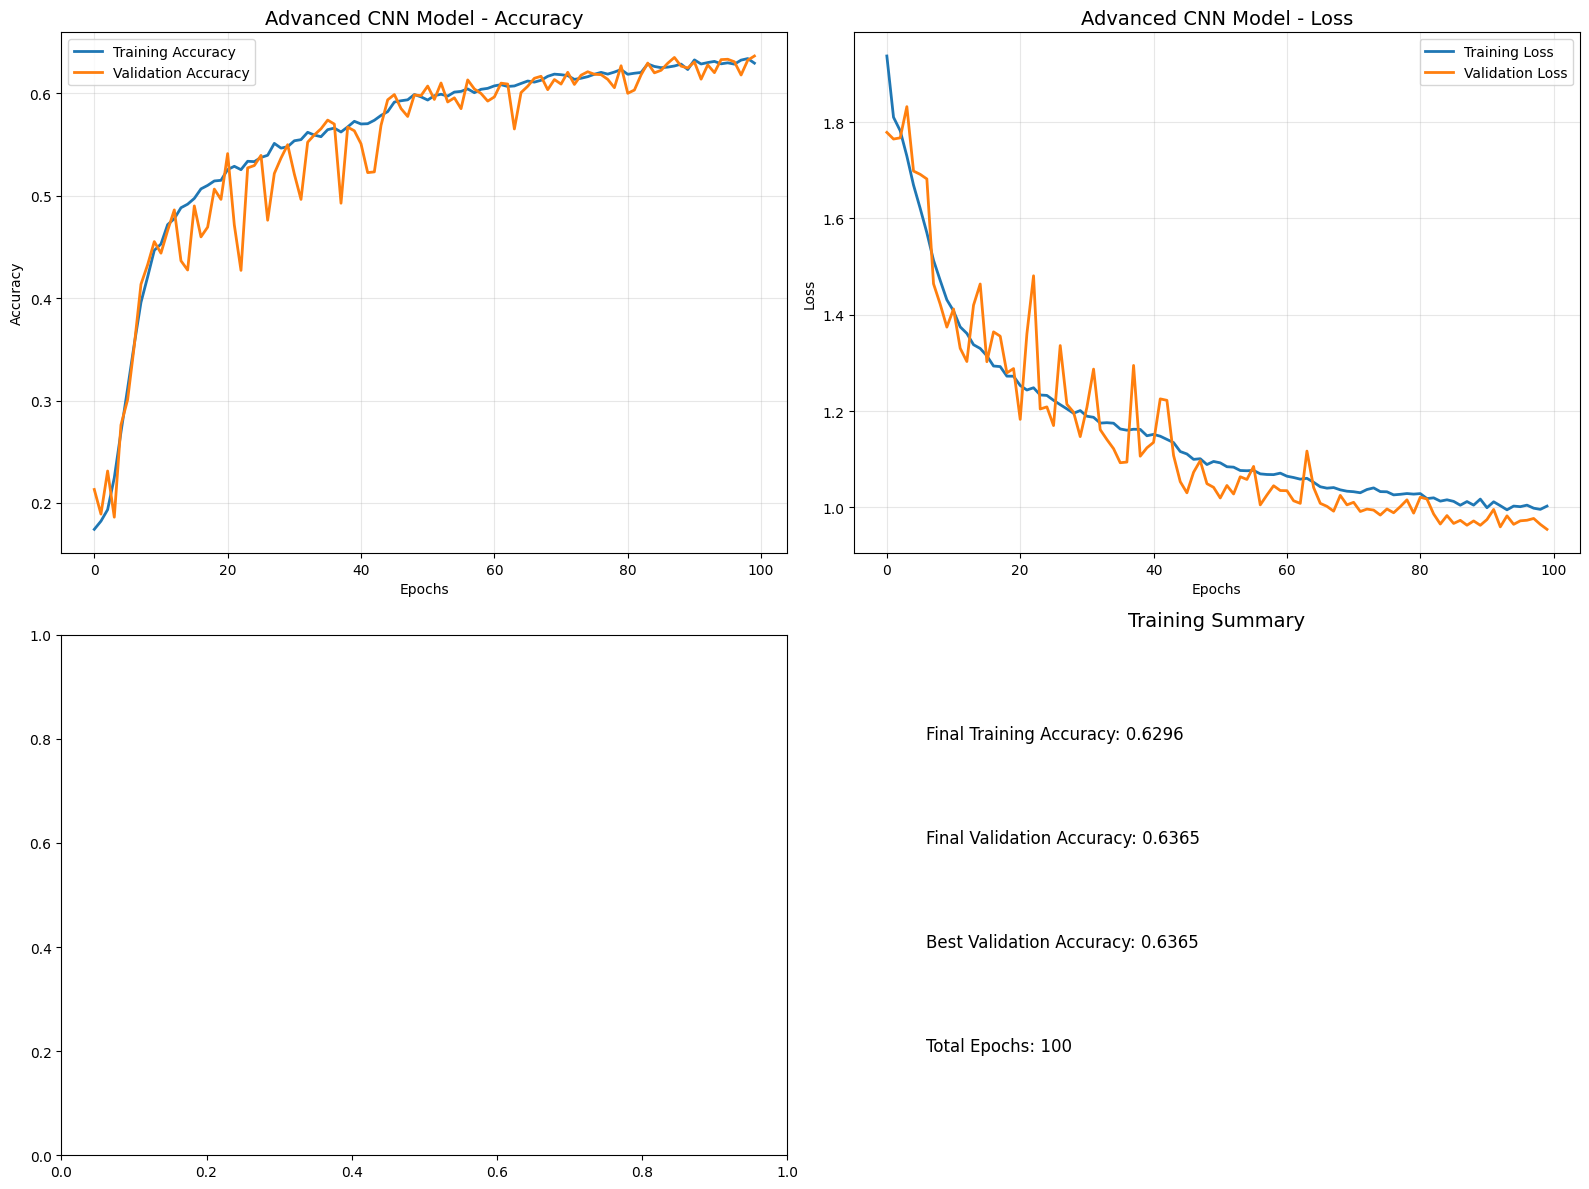


Evaluating Advanced CNN Model...
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step
=== Comprehensive Evaluation for Advanced CNN ===
Classification Report:
              precision    recall  f1-score   support

       angry     0.5688    0.6555    0.6091       958
        fear     0.5948    0.3555    0.4450      1024
       happy     0.9005    0.8472    0.8731      1774
     neutral     0.5486    0.7234    0.6240      1233
         sad     0.5545    0.5060    0.5291      1247
    surprise     0.7440    0.8219    0.7810       831

    accuracy                         0.6652      7067
   macro avg     0.6519    0.6516    0.6436      7067
weighted avg     0.6704    0.6652    0.6603      7067

Overall Accuracy: 0.6652

Per-class Accuracy:
  angry: 0.6555
  fear: 0.3555
  happy: 0.8472
  neutral: 0.7234
  sad: 0.5060
  surprise: 0.8219


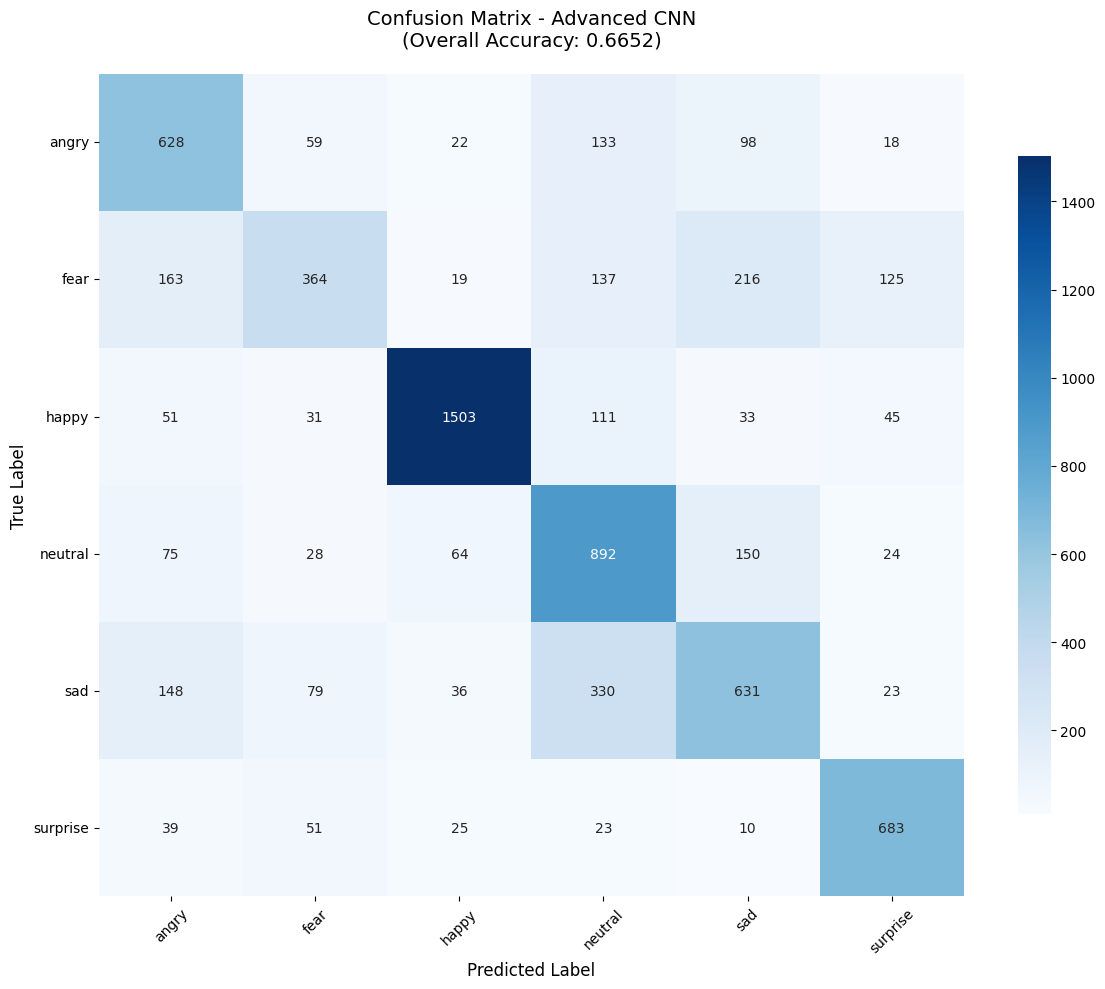

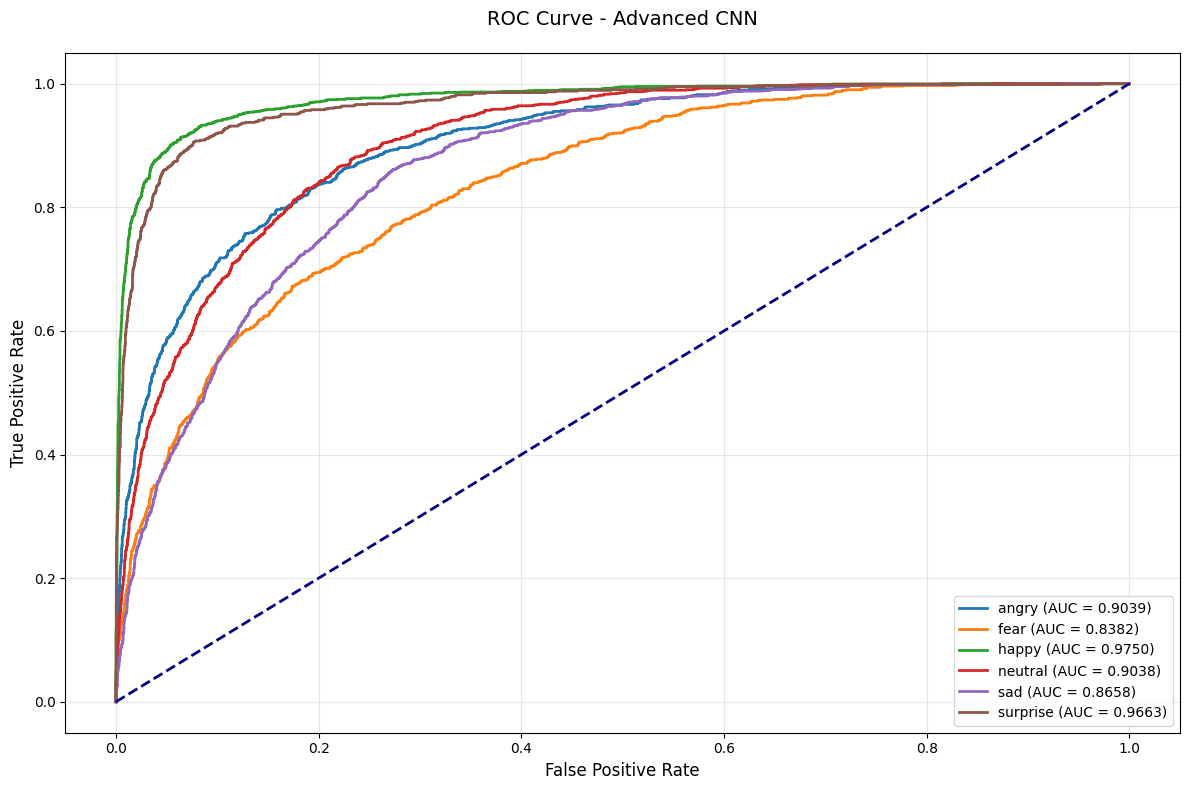

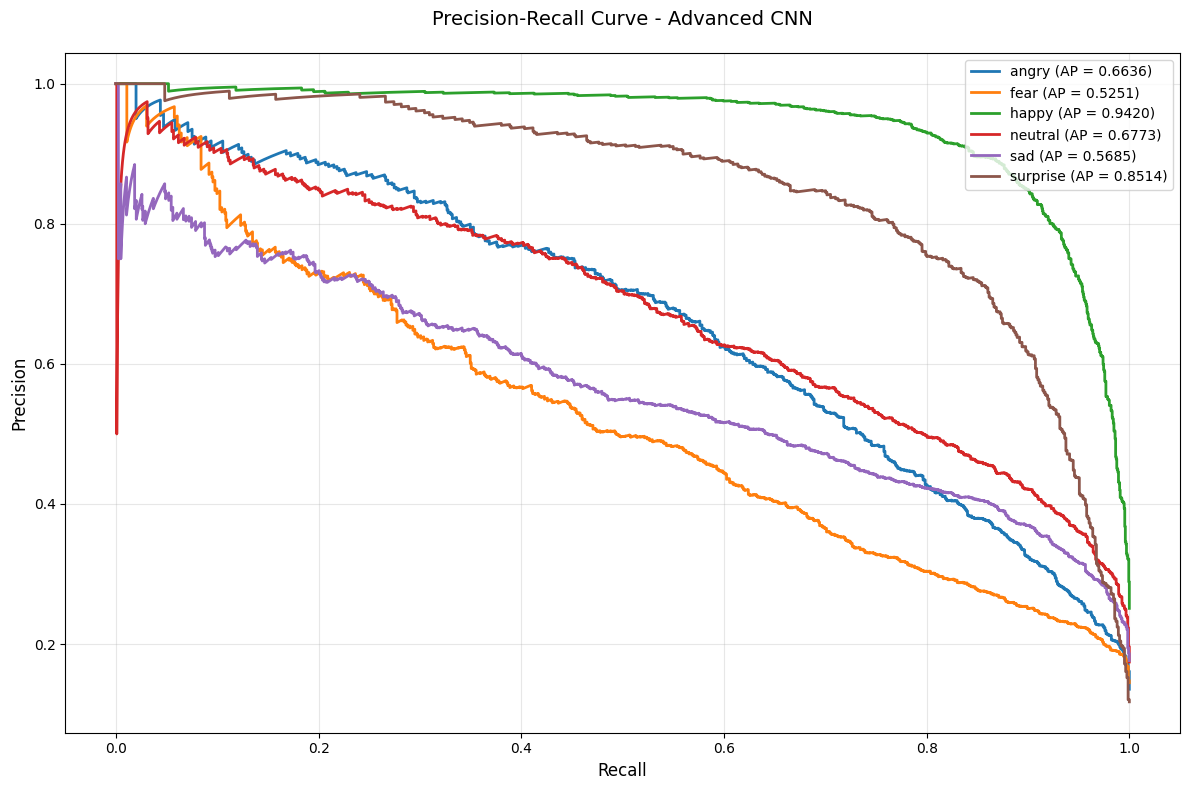


TRAINING EFFICIENT CNN MODEL
Class weights for handling imbalance:
  angry: 1.1795
  fear: 1.1500
  happy: 0.6531
  neutral: 0.9491
  sad: 0.9756
  surprise: 1.4859


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.1786 - loss: 2.4248
Epoch 1: val_accuracy improved from -inf to 0.17085, saving model to best_efficient_cnn_model.keras
354/354 ━━━━━━━━━━━━━━━━━━━━ 83s 170ms/step - accuracy: 0.1787 - loss: 2.4241 - val_accuracy: 0.1709 - val_loss: 1.8958 - learning_rate: 0.0010
Epoch 2/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1822 - loss: 1.9025
Epoch 2: val_accuracy improved from 0.17085 to 0.18376, saving model to best_efficient_cnn_model.keras
354/354 ━━━━━━━━━━━━━━━━━━━━ 34s 81ms/step - accuracy: 0.1822 - loss: 1.9024 - val_accuracy: 0.1838 - val_loss: 1.7898 - learning_rate: 0.0010
Epoch 3/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1939 - loss: 1.8129
Epoch 3: val_accuracy improved from 0.18376 to 0.25893, saving model to best_efficient_cnn_model.keras
354/354 ━━━━━━━━━━━━━━━━━━━━ 29s 82ms/step - accuracy: 0.1939 - loss: 1.8129 - val_accuracy: 0.2589 - val_loss: 1.7395 - learning_rate: 0.0010

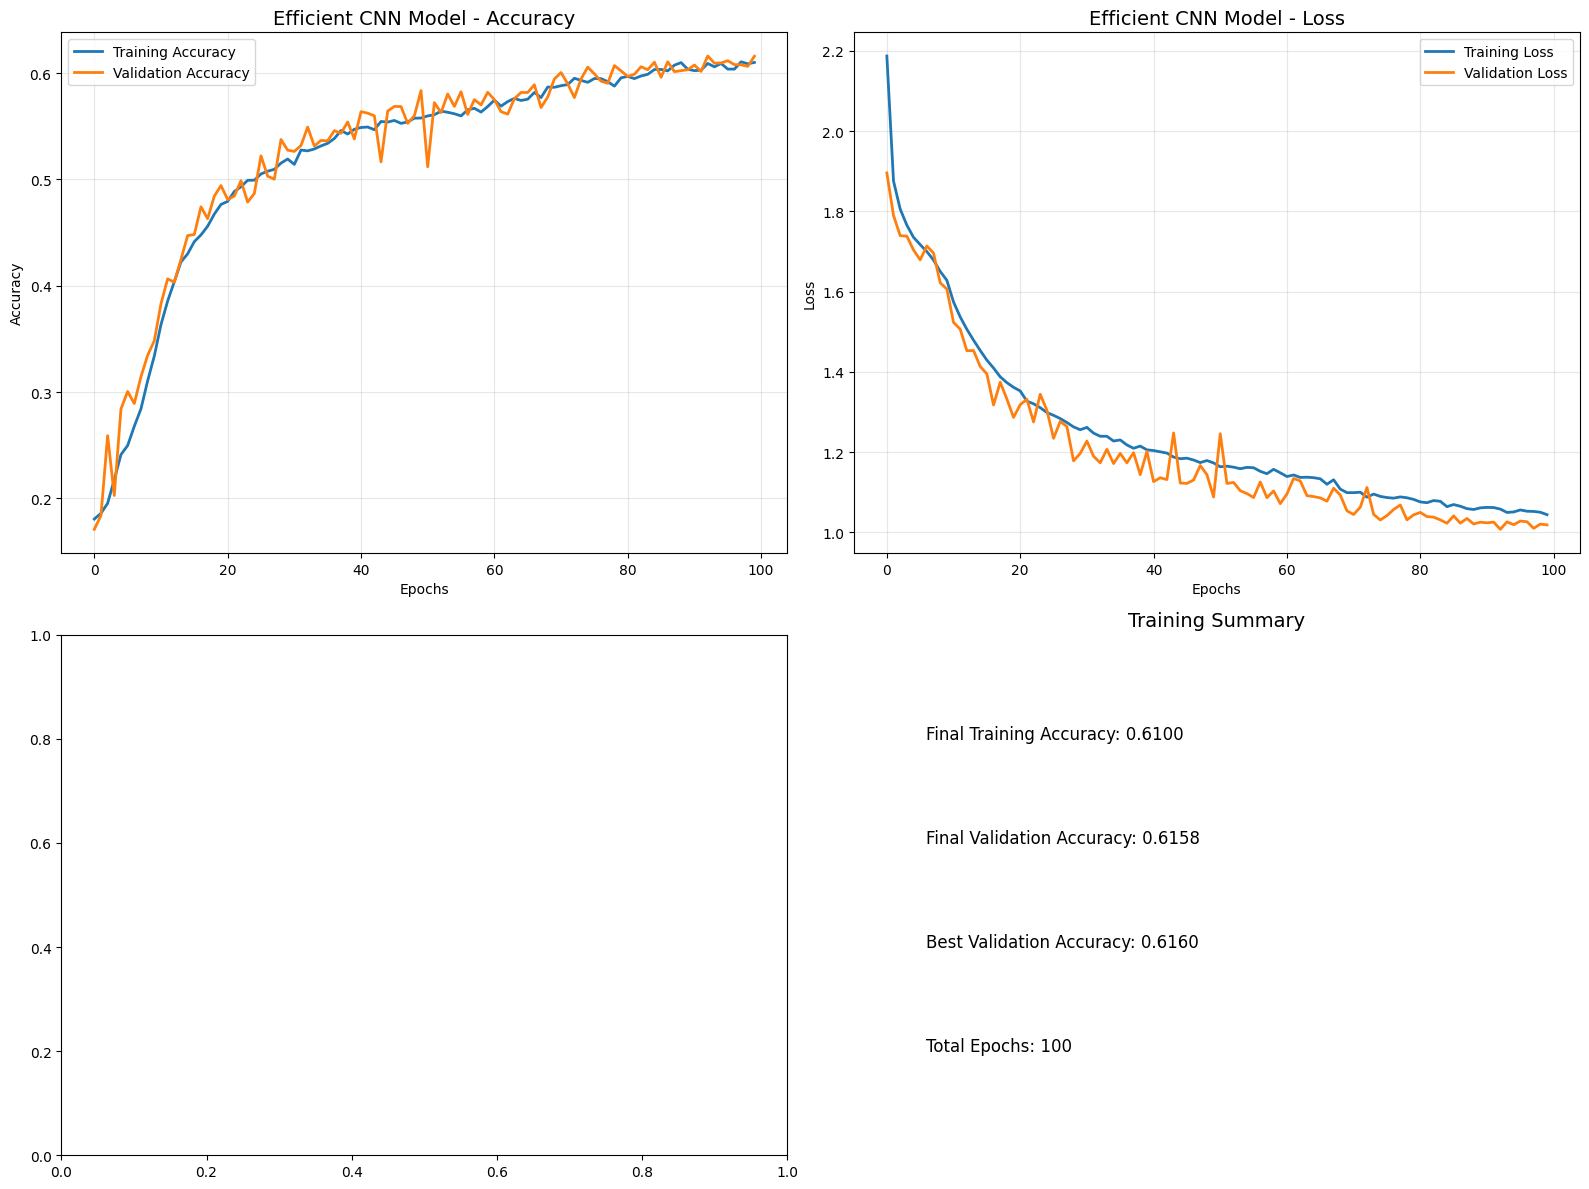


Evaluating Efficient CNN Model...
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step
=== Comprehensive Evaluation for Efficient CNN ===
Classification Report:
              precision    recall  f1-score   support

       angry     0.5071    0.6691    0.5770       958
        fear     0.6071    0.2822    0.3853      1024
       happy     0.8947    0.8286    0.8604      1774
     neutral     0.5064    0.7421    0.6020      1233
         sad     0.5585    0.4290    0.4853      1247
    surprise     0.7214    0.7978    0.7577       831

    accuracy                         0.6386      7067
   macro avg     0.6325    0.6248    0.6113      7067
weighted avg     0.6530    0.6386    0.6298      7067

Overall Accuracy: 0.6386

Per-class Accuracy:
  angry: 0.6691
  fear: 0.2822
  happy: 0.8286
  neutral: 0.7421
  sad: 0.4290
  surprise: 0.7978


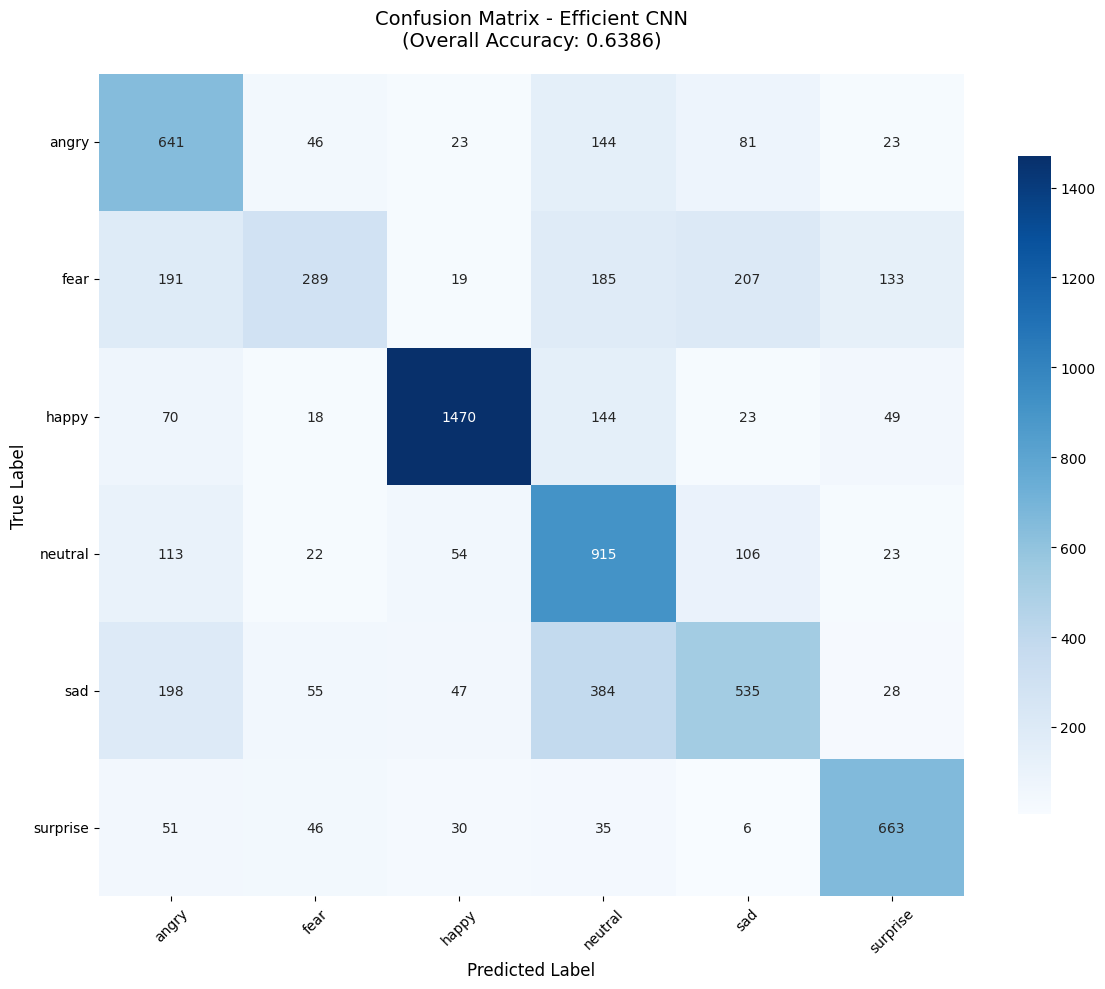

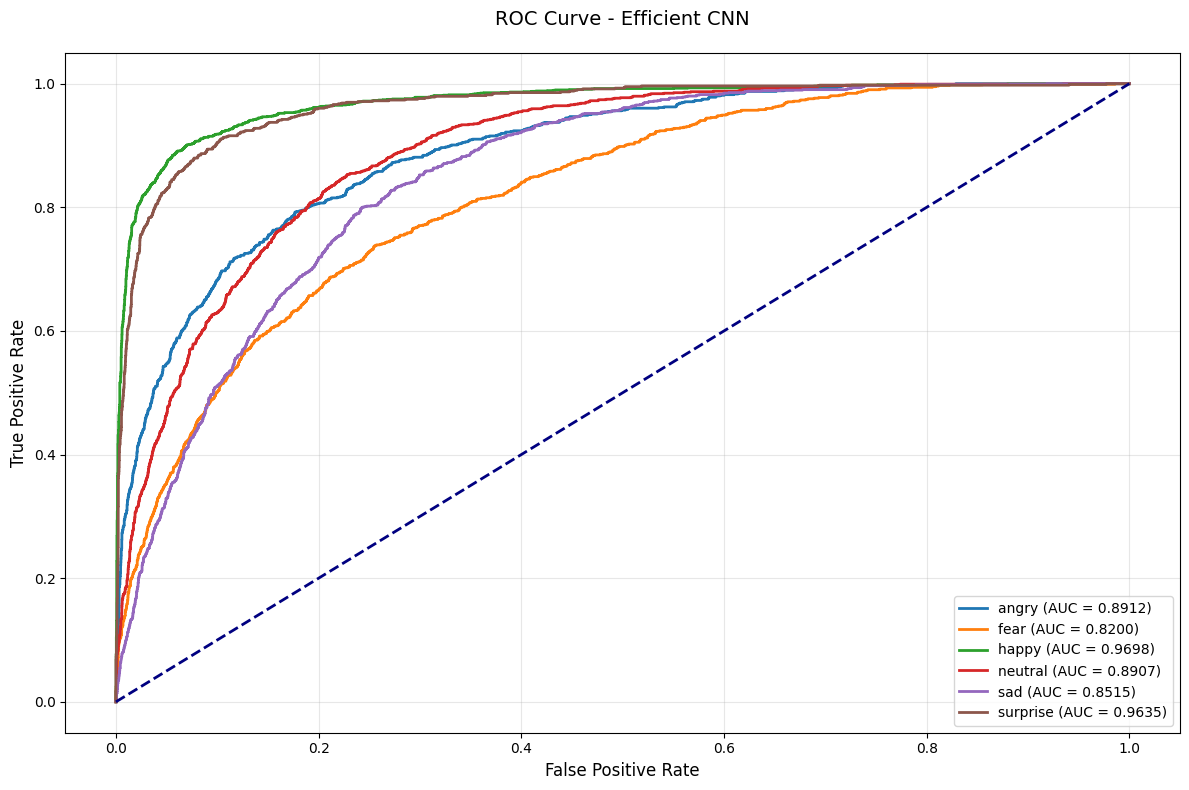


ENSEMBLE PREDICTION
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
Ensemble Accuracy: 0.6593

Ensemble Classification Report:
              precision    recall  f1-score   support

       angry     0.5460    0.6691    0.6013       958
        fear     0.6078    0.3193    0.4187      1024
       happy     0.9016    0.8472    0.8736      1774
     neutral     0.5362    0.7445    0.6234      1233
         sad     0.5607    0.4739    0.5137      1247
    surprise     0.7364    0.8171    0.7747       831

    accuracy                         0.6593      7067
   macro avg     0.6481    0.6452    0.6342      7067
weighted avg     0.6675    0.6593    0.6520      7067



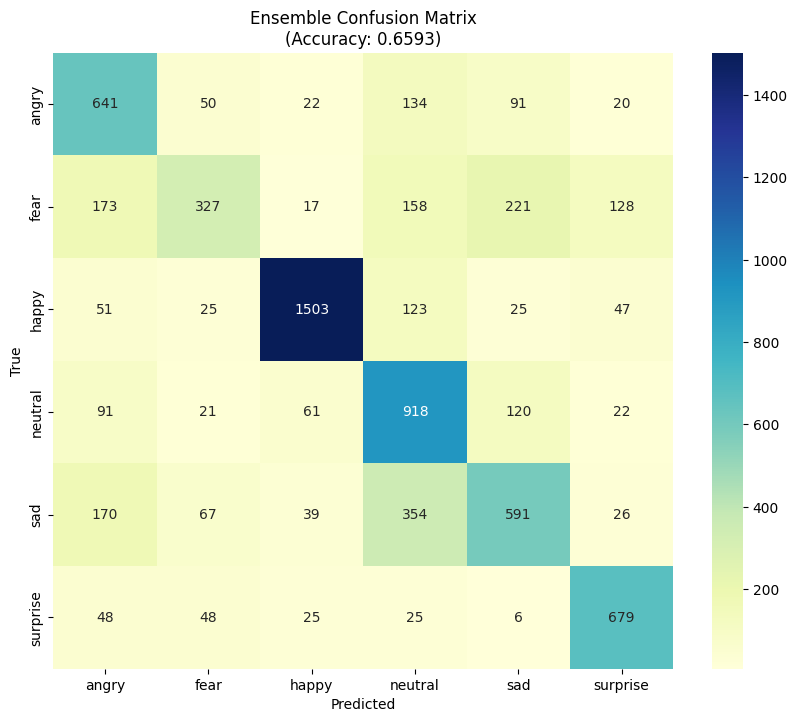


FINAL PERFORMANCE COMPARISON
Advanced CNN: Test Accuracy = 0.6652, Test Loss = 0.8904
Efficient CNN: Test Accuracy = 0.6386, Test Loss = 0.9573
Ensemble: Test Accuracy = 0.6593

Enhanced model saved successfully as 'fer_enhanced_model.keras'

=== Training Complete ===


In [5]:
# General-purpose imports
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import quote
import webbrowser
import random
from collections import defaultdict
from base64 import b64decode

# Scikit-learn imports
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Imbalanced-learn imports
from imblearn.over_sampling import SMOTE

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,
    Input, GlobalAveragePooling2D, SeparableConv2D, Multiply,
    Activation, Add, GlobalMaxPooling2D, concatenate
)
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2
from tensorflow.keras import backend as K

# For AdamW optimizer (if available)
try:
    from tensorflow.keras.optimizers import AdamW
except ImportError:
    AdamW = Adam

# IPython displays
from IPython.display import display

# Kerastuner imports
from kerastuner.tuners import RandomSearch

# ---------------------------- Configurations ---------------------------- #
IMAGE_SIZE = 48
BATCH_SIZE = 64
EPOCHS = 100

TRAIN_PATH = "/content/fer2013/train"
TEST_PATH = "/content/fer2013/test"
SELECTED_CLASSES = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# ---------------------------- Enhanced Utility Functions ---------------------------- #
def plot_class_distribution(generator, title):
    """Plot class distribution of a dataset."""
    class_counts = generator.classes
    class_labels = list(generator.class_indices.keys())
    counts = pd.Series(class_counts).value_counts(sort=False)
    counts.index = [class_labels[i] for i in counts.index]
    plt.figure(figsize=(10, 6))
    counts.plot(kind='barh', title=title)
    plt.xlabel('Number of Images')
    plt.ylabel('Class')
    plt.tight_layout()
    plt.show()
    print(f"Class counts for {title}:")
    for class_name, count in counts.items():
        print(f"  {class_name}: {count}")

def focal_loss(gamma=2., alpha=0.25):
    """Focal loss for dealing with class imbalance."""
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1 + K.epsilon())) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0 + K.epsilon()))
    return focal_loss_fixed

# ---------------------------- Enhanced Data Preprocessing ---------------------------- #
def create_enhanced_generators(train_path, test_path, img_size, batch_size, selected_classes):
    """Create enhanced data generators with better augmentation for grayscale images."""

    # More aggressive augmentation for training
    train_preprocessor = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,  # Increased rotation
        zoom_range=0.3,     # Increased zoom
        width_shift_range=0.2,  # Increased shift
        height_shift_range=0.2,
        shear_range=0.15,   # Increased shear
        horizontal_flip=True,
        brightness_range=[0.7, 1.3],  # Wider brightness range
        fill_mode='nearest',
        validation_split=0.2
    )

    test_preprocessor = ImageDataGenerator(rescale=1./255)

    # Color mode set to 'grayscale' for 1 channel
    train_generator = train_preprocessor.flow_from_directory(
        train_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="categorical",
        subset="training",
        classes=selected_classes,
        shuffle=True,
        color_mode='grayscale'  # Important: Use grayscale
    )

    validation_generator = train_preprocessor.flow_from_directory(
        train_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="categorical",
        subset="validation",
        classes=selected_classes,
        shuffle=False,
        color_mode='grayscale'  # Important: Use grayscale
    )

    test_generator = test_preprocessor.flow_from_directory(
        test_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=False,
        classes=selected_classes,
        color_mode='grayscale'  # Important: Use grayscale
    )

    return train_generator, validation_generator, test_generator

# ---------------------------- Advanced Model Architectures ---------------------------- #
def build_advanced_cnn_model(input_shape, num_classes):
    """Build an advanced CNN model with residual connections and attention mechanisms."""

    inputs = Input(shape=input_shape)

    # Initial conv block
    x = Conv2D(32, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    # Residual block 1
    residual = x
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    # Adjust residual dimensions if needed
    if residual.shape[-1] != 64:
        residual = Conv2D(64, (1, 1), padding='same')(residual)
    x = Add()([x, residual])
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # Residual block 2
    residual = x
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    if residual.shape[-1] != 128:
        residual = Conv2D(128, (1, 1), padding='same')(residual)
    x = Add()([x, residual])
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.35)(x)

    # Residual block 3
    residual = x
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    if residual.shape[-1] != 256:
        residual = Conv2D(256, (1, 1), padding='same')(residual)
    x = Add()([x, residual])
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.4)(x)

    # Global pooling and dense layers
    x = GlobalAveragePooling2D()(x)

    # Attention mechanism in dense layers
    x = Dense(512)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)

    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.4)(x)

    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

def build_efficient_cnn_model(input_shape, num_classes):
    """Build an efficient CNN model with depthwise separable convolutions."""

    model = Sequential([
        # First block with regular conv
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Second block with separable conv
        SeparableConv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        SeparableConv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        # Third block
        SeparableConv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        SeparableConv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.35),

        # Fourth block
        SeparableConv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        SeparableConv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        # Classifier
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    return model

# ---------------------------- Enhanced Callbacks ---------------------------- #
def get_enhanced_callbacks(model_name):
    """Get enhanced callbacks for training."""
    checkpoint = ModelCheckpoint(
        f"best_{model_name}_model.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max',
        verbose=1
    )

    early_stopping = EarlyStopping(
        monitor="val_accuracy",
        patience=20,  # Increased patience
        restore_best_weights=True,
        mode='max',
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=8,  # Increased patience
        min_lr=1e-7,
        verbose=1
    )

    csv_logger = CSVLogger(f'training_{model_name}.log')

    return [checkpoint, early_stopping, reduce_lr, csv_logger]

# ---------------------------- Advanced Training Strategy ---------------------------- #
def train_with_advanced_strategy(model, train_gen, val_gen, model_name, epochs):
    """Train model with advanced strategies including learning rate scheduling."""

    # Calculate class weights for imbalanced data
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(train_gen.classes),
        y=train_gen.classes
    )
    class_weight_dict = dict(enumerate(class_weights))

    print("Class weights for handling imbalance:")
    for class_idx, weight in class_weight_dict.items():
        class_name = list(train_gen.class_indices.keys())[class_idx]
        print(f"  {class_name}: {weight:.4f}")

    # Compile with different optimizers and loss functions
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',  # You can try focal_loss here
        metrics=['accuracy']
    )

    # Train model
    history = model.fit(
        train_gen,
        epochs=epochs,
        validation_data=val_gen,
        callbacks=get_enhanced_callbacks(model_name),
        class_weight=class_weight_dict,  # Use class weights
        verbose=1
    )

    return history

# ---------------------------- Enhanced Model Evaluation ---------------------------- #
def evaluate_and_plot_metrics(model, generator, selected_classes, title):
    """Enhanced model evaluation with comprehensive metrics."""
    predictions = model.predict(generator)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = generator.classes

    print(f"=== Comprehensive Evaluation for {title} ===")
    print(f"Classification Report:")
    print(classification_report(true_classes, pred_classes, target_names=selected_classes, digits=4))

    # Calculate additional metrics
    accuracy = np.mean(pred_classes == true_classes)
    print(f"Overall Accuracy: {accuracy:.4f}")

    # Per-class accuracy
    cm = confusion_matrix(true_classes, pred_classes)
    per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
    print("\nPer-class Accuracy:")
    for i, class_name in enumerate(selected_classes):
        print(f"  {class_name}: {per_class_accuracy[i]:.4f}")

    # Enhanced confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=selected_classes, yticklabels=selected_classes,
                cbar_kws={'shrink': 0.8})
    plt.title(f"Confusion Matrix - {title}\n(Overall Accuracy: {accuracy:.4f})", fontsize=14, pad=20)
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Enhanced ROC curve
    true_binary = tf.keras.utils.to_categorical(true_classes, num_classes=len(selected_classes))
    plt.figure(figsize=(12, 8))
    for i, class_name in enumerate(selected_classes):
        fpr, tpr, _ = roc_curve(true_binary[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.4f})', linewidth=2)

    plt.plot([0, 1], [0, 1], linestyle='--', color='navy', linewidth=2)
    plt.title(f"ROC Curve - {title}", fontsize=14, pad=20)
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return predictions, accuracy

# ---------------------------- Enhanced Training History Plot ---------------------------- #
def plot_enhanced_training_history(history, title):
    """Plot enhanced training history with additional metrics."""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[0, 0].set_title(f'{title} - Accuracy', fontsize=14)
    axes[0, 0].set_xlabel('Epochs')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Loss
    axes[0, 1].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[0, 1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[0, 1].set_title(f'{title} - Loss', fontsize=14)
    axes[0, 1].set_xlabel('Epochs')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Learning Rate (if available)
    if 'lr' in history.history:
        axes[1, 0].plot(history.history['lr'], label='Learning Rate', linewidth=2, color='red')
        axes[1, 0].set_title('Learning Rate Schedule', fontsize=14)
        axes[1, 0].set_xlabel('Epochs')
        axes[1, 0].set_ylabel('Learning Rate')
        axes[1, 0].set_yscale('log')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

    # Final metrics summary
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    best_val_acc = max(history.history['val_accuracy'])

    axes[1, 1].text(0.1, 0.8, f'Final Training Accuracy: {final_train_acc:.4f}', fontsize=12)
    axes[1, 1].text(0.1, 0.6, f'Final Validation Accuracy: {final_val_acc:.4f}', fontsize=12)
    axes[1, 1].text(0.1, 0.4, f'Best Validation Accuracy: {best_val_acc:.4f}', fontsize=12)
    axes[1, 1].text(0.1, 0.2, f'Total Epochs: {len(history.history["accuracy"])}', fontsize=12)
    axes[1, 1].set_title('Training Summary', fontsize=14)
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

# ---------------------------- PR Curve Plot ---------------------------- #
def plot_precision_recall_curve(generator, predictions, selected_classes, title):
    """Plot Precision-Recall curve for each class."""
    true_classes = generator.classes
    true_binary = tf.keras.utils.to_categorical(true_classes, num_classes=len(selected_classes))

    plt.figure(figsize=(12, 8))
    for i, class_name in enumerate(selected_classes):
        precision, recall, _ = precision_recall_curve(true_binary[:, i], predictions[:, i])
        avg_precision = auc(recall, precision)
        plt.plot(recall, precision, label=f'{class_name} (AP = {avg_precision:.4f})', linewidth=2)

    plt.title(f'Precision-Recall Curve - {title}', fontsize=14, pad=20)
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# ---------------------------- Ensemble Prediction ---------------------------- #
def create_ensemble_predictions(models, generator):
    """Create ensemble predictions from multiple models."""
    all_predictions = []
    for model in models:
        pred = model.predict(generator)
        all_predictions.append(pred)

    # Average predictions
    ensemble_pred = np.mean(all_predictions, axis=0)
    return ensemble_pred

# ---------------------------- Main Pipeline Execution ---------------------------- #
if __name__ == "__main__":
    print("=== FER2013 Facial Expression Recognition with Enhanced Accuracy ===\n")

    # Use enhanced generators with grayscale
    print("Creating data generators with grayscale images...")
    train_generator, validation_generator, test_generator = create_enhanced_generators(
        TRAIN_PATH, TEST_PATH, IMAGE_SIZE, BATCH_SIZE, SELECTED_CLASSES
    )

    # Print class distributions
    print("\n=== Dataset Analysis ===")
    print("Training class distribution:")
    plot_class_distribution(train_generator, "Training Data Distribution")

    print("Validation class distribution:")
    plot_class_distribution(validation_generator, "Validation Data Distribution")

    print("Test class distribution:")
    plot_class_distribution(test_generator, "Test Data Distribution")

    # Update input shape for grayscale (1 channel)
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 1)
    num_classes = len(SELECTED_CLASSES)

    print(f"\nInput shape: {input_shape}")
    print(f"Number of classes: {num_classes}")

    # Train multiple models for potential ensemble
    models = []
    histories = []

    # Model 1: Advanced CNN with residual connections
    print("\n" + "="*60)
    print("TRAINING ADVANCED CNN MODEL")
    print("="*60)

    advanced_model = build_advanced_cnn_model(input_shape, num_classes)
    advanced_model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print("Advanced CNN Model Summary:")
    advanced_model.summary()

    history_advanced = train_with_advanced_strategy(
        advanced_model, train_generator, validation_generator, "advanced_cnn", EPOCHS
    )
    histories.append(history_advanced)
    models.append(advanced_model)

    # Plot training history
    plot_enhanced_training_history(history_advanced, "Advanced CNN Model")

    # Evaluate advanced model
    print("\nEvaluating Advanced CNN Model...")
    advanced_predictions, advanced_accuracy = evaluate_and_plot_metrics(
        advanced_model, test_generator, SELECTED_CLASSES, "Advanced CNN"
    )

    # Plot PR curve for advanced model
    plot_precision_recall_curve(test_generator, advanced_predictions, SELECTED_CLASSES, "Advanced CNN")

    # Model 2: Efficient CNN
    print("\n" + "="*60)
    print("TRAINING EFFICIENT CNN MODEL")
    print("="*60)

    efficient_model = build_efficient_cnn_model(input_shape, num_classes)
    efficient_model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history_efficient = train_with_advanced_strategy(
        efficient_model, train_generator, validation_generator, "efficient_cnn", EPOCHS
    )
    histories.append(history_efficient)
    models.append(efficient_model)

    # Plot training history
    plot_enhanced_training_history(history_efficient, "Efficient CNN Model")

    # Evaluate efficient model
    print("\nEvaluating Efficient CNN Model...")
    efficient_predictions, efficient_accuracy = evaluate_and_plot_metrics(
        efficient_model, test_generator, SELECTED_CLASSES, "Efficient CNN"
    )

    # Ensemble prediction (if multiple models are available)
    if len(models) > 1:
        print("\n" + "="*60)
        print("ENSEMBLE PREDICTION")
        print("="*60)

        ensemble_predictions = create_ensemble_predictions(models, test_generator)
        ensemble_classes = np.argmax(ensemble_predictions, axis=1)
        true_classes = test_generator.classes
        ensemble_accuracy = np.mean(ensemble_classes == true_classes)

        print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")
        print("\nEnsemble Classification Report:")
        print(classification_report(true_classes, ensemble_classes, target_names=SELECTED_CLASSES, digits=4))

        # Plot ensemble confusion matrix
        cm_ensemble = confusion_matrix(true_classes, ensemble_classes)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='YlGnBu',
                    xticklabels=SELECTED_CLASSES, yticklabels=SELECTED_CLASSES)
        plt.title(f"Ensemble Confusion Matrix\n(Accuracy: {ensemble_accuracy:.4f})")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

    # Final performance comparison
    print("\n" + "="*60)
    print("FINAL PERFORMANCE COMPARISON")
    print("="*60)

    # Get final test performance for all models
    for i, model in enumerate(models):
        test_loss, test_acc = model.evaluate(test_generator, verbose=0)
        model_name = "Advanced CNN" if i == 0 else "Efficient CNN"
        print(f"{model_name}: Test Accuracy = {test_acc:.4f}, Test Loss = {test_loss:.4f}")

    if len(models) > 1:
        print(f"Ensemble: Test Accuracy = {ensemble_accuracy:.4f}")

    # Save the best model
    best_model = models[0]  # Or choose based on validation performance
    best_model.save('fer_enhanced_model.keras')
    print("\nEnhanced model saved successfully as 'fer_enhanced_model.keras'")

    print("\n=== Training Complete ===")